In [29]:
import pandas as pd
import numpy as np
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
import time

### The Task
To compare the Decision Tree method with the Random Forest Classifier. They will be run on a New York Crime dataset, that shows the number of crimes of various types that occurred in each town in the course of one year. The main point of comparison will be runtime, which will be used as a proy for simplicity

### Import and Data Cleaning

In [30]:
texcrime = pd.read_excel('C://Users//fergu//table_8_offenses_known_to_law_enforcement_texas_by_city_2013.xls', skiprows=4)

In [31]:
texcrime.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Abernathy,2821.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,12.0,0.0,0.0,1.0
1,Abilene,119401.0,477.0,1.0,NaN,37.0,125.0,314.0,4769.0,1055.0,3460.0,254.0,16.0
2,Addison,15961.0,51.0,1.0,NaN,4.0,11.0,35.0,784.0,129.0,593.0,62.0,1.0
3,Alamo,18876.0,164.0,0.0,NaN,11.0,27.0,126.0,1336.0,203.0,1052.0,81.0,1.0
4,Alamo Heights,7443.0,9.0,0.0,NaN,2.0,2.0,5.0,235.0,36.0,194.0,5.0,0.0


In [32]:
texcrime.shape

(607, 13)

In [33]:
texcrime.columns = ['city','population','violent_crime','murder','rape1','rape2','robbery','agg_assault','property','burglary','larceny','veh_theft','arson3']

In [34]:
texcrime.drop('rape1', axis=1, inplace=True)

In [35]:
texcrime.head()

,city,population,violent_crime,murder,rape2,robbery,agg_assault,property,burglary,larceny,veh_theft,arson3
0,Abernathy,2821.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,1.0
1,Abilene,119401.0,477.0,1.0,37.0,125.0,314.0,4769.0,1055.0,3460.0,254.0,16.0
2,Addison,15961.0,51.0,1.0,4.0,11.0,35.0,784.0,129.0,593.0,62.0,1.0
3,Alamo,18876.0,164.0,0.0,11.0,27.0,126.0,1336.0,203.0,1052.0,81.0,1.0
4,Alamo Heights,7443.0,9.0,0.0,2.0,2.0,5.0,235.0,36.0,194.0,5.0,0.0


In [36]:
texcrime.tail()

,city,population,violent_crime,murder,rape2,robbery,agg_assault,property,burglary,larceny,veh_theft,arson3
602,Yoakum,5927.0,8.0,0.0,0.0,3.0,5.0,165.0,79.0,79.0,7.0,0.0
603,Yorktown,2133.0,12.0,0.0,7.0,0.0,5.0,52.0,21.0,30.0,1.0,0.0
604,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
texcrime = texcrime[:-3]
texcrime.tail()

,city,population,violent_crime,murder,rape2,robbery,agg_assault,property,burglary,larceny,veh_theft,arson3
599,Woodway,8626.0,8.0,0.0,1.0,2.0,5.0,143.0,20.0,121.0,2.0,0.0
600,Wortham,1044.0,1.0,0.0,0.0,0.0,1.0,51.0,12.0,37.0,2.0,0.0
601,Wylie,45138.0,32.0,1.0,NaN,3.0,19.0,526.0,75.0,433.0,18.0,0.0
602,Yoakum,5927.0,8.0,0.0,0.0,3.0,5.0,165.0,79.0,79.0,7.0,0.0
603,Yorktown,2133.0,12.0,0.0,7.0,0.0,5.0,52.0,21.0,30.0,1.0,0.0


In [38]:
nan_list = [np.isnan(texcrime[col]).sum() for col in texcrime.columns[1:]]
sum(nan_list)

43

In [39]:
texcrime.isnull().sum()

city              0
population        0
violent_crime     0
murder            0
rape2            41
robbery           0
agg_assault       0
property          0
burglary          0
larceny           0
veh_theft         0
arson3            2
dtype: int64

In [40]:
texcrime.fillna(value=0, inplace=True)

In [41]:
texcrime.isnull().sum()

city             0
population       0
violent_crime    0
murder           0
rape2            0
robbery          0
agg_assault      0
property         0
burglary         0
larceny          0
veh_theft        0
arson3           0
dtype: int64

### Look at Murder as a Viable Criterion
Roughly a quarter of the towns in the dataset have had one or more murders in the year in question. Thus, whether or not a town has murders could be a sensible target variable for the analysis.

In [42]:
texcrime['murder'].value_counts()

0.0      451
1.0       87
2.0       28
3.0       11
5.0        7
6.0        4
4.0        4
18.0       2
11.0       1
48.0       1
10.0       1
7.0        1
16.0       1
214.0      1
26.0       1
9.0        1
72.0       1
143.0      1
Name: murder, dtype: int64

In [43]:
texcrime['murd_bin'] = [1 if texcrime['murder'][i] > 0 else 0 for i in range(0, len(texcrime['city']))]

In [44]:
texcrime.head()

,city,population,violent_crime,murder,rape2,robbery,agg_assault,property,burglary,larceny,veh_theft,arson3,murd_bin
0,Abernathy,2821.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,1.0,0
1,Abilene,119401.0,477.0,1.0,37.0,125.0,314.0,4769.0,1055.0,3460.0,254.0,16.0,1
2,Addison,15961.0,51.0,1.0,4.0,11.0,35.0,784.0,129.0,593.0,62.0,1.0,1
3,Alamo,18876.0,164.0,0.0,11.0,27.0,126.0,1336.0,203.0,1052.0,81.0,1.0,0
4,Alamo Heights,7443.0,9.0,0.0,2.0,2.0,5.0,235.0,36.0,194.0,5.0,0.0,0


In [45]:
texmurd = texcrime['murd_bin']

In [46]:
texcrime.drop(['city', 'murder', 'murd_bin'], axis=1, inplace=True)

In [47]:
texcrime.head()

,population,violent_crime,rape2,robbery,agg_assault,property,burglary,larceny,veh_theft,arson3
0,2821.0,0.0,0.0,0.0,0.0,12.0,12.0,0.0,0.0,1.0
1,119401.0,477.0,37.0,125.0,314.0,4769.0,1055.0,3460.0,254.0,16.0
2,15961.0,51.0,4.0,11.0,35.0,784.0,129.0,593.0,62.0,1.0
3,18876.0,164.0,11.0,27.0,126.0,1336.0,203.0,1052.0,81.0,1.0
4,7443.0,9.0,2.0,2.0,5.0,235.0,36.0,194.0,5.0,0.0


### Create a Decision Tree
Runtime = 0.01 seconds

Time elapsed: 0.02193903923034668 seconds


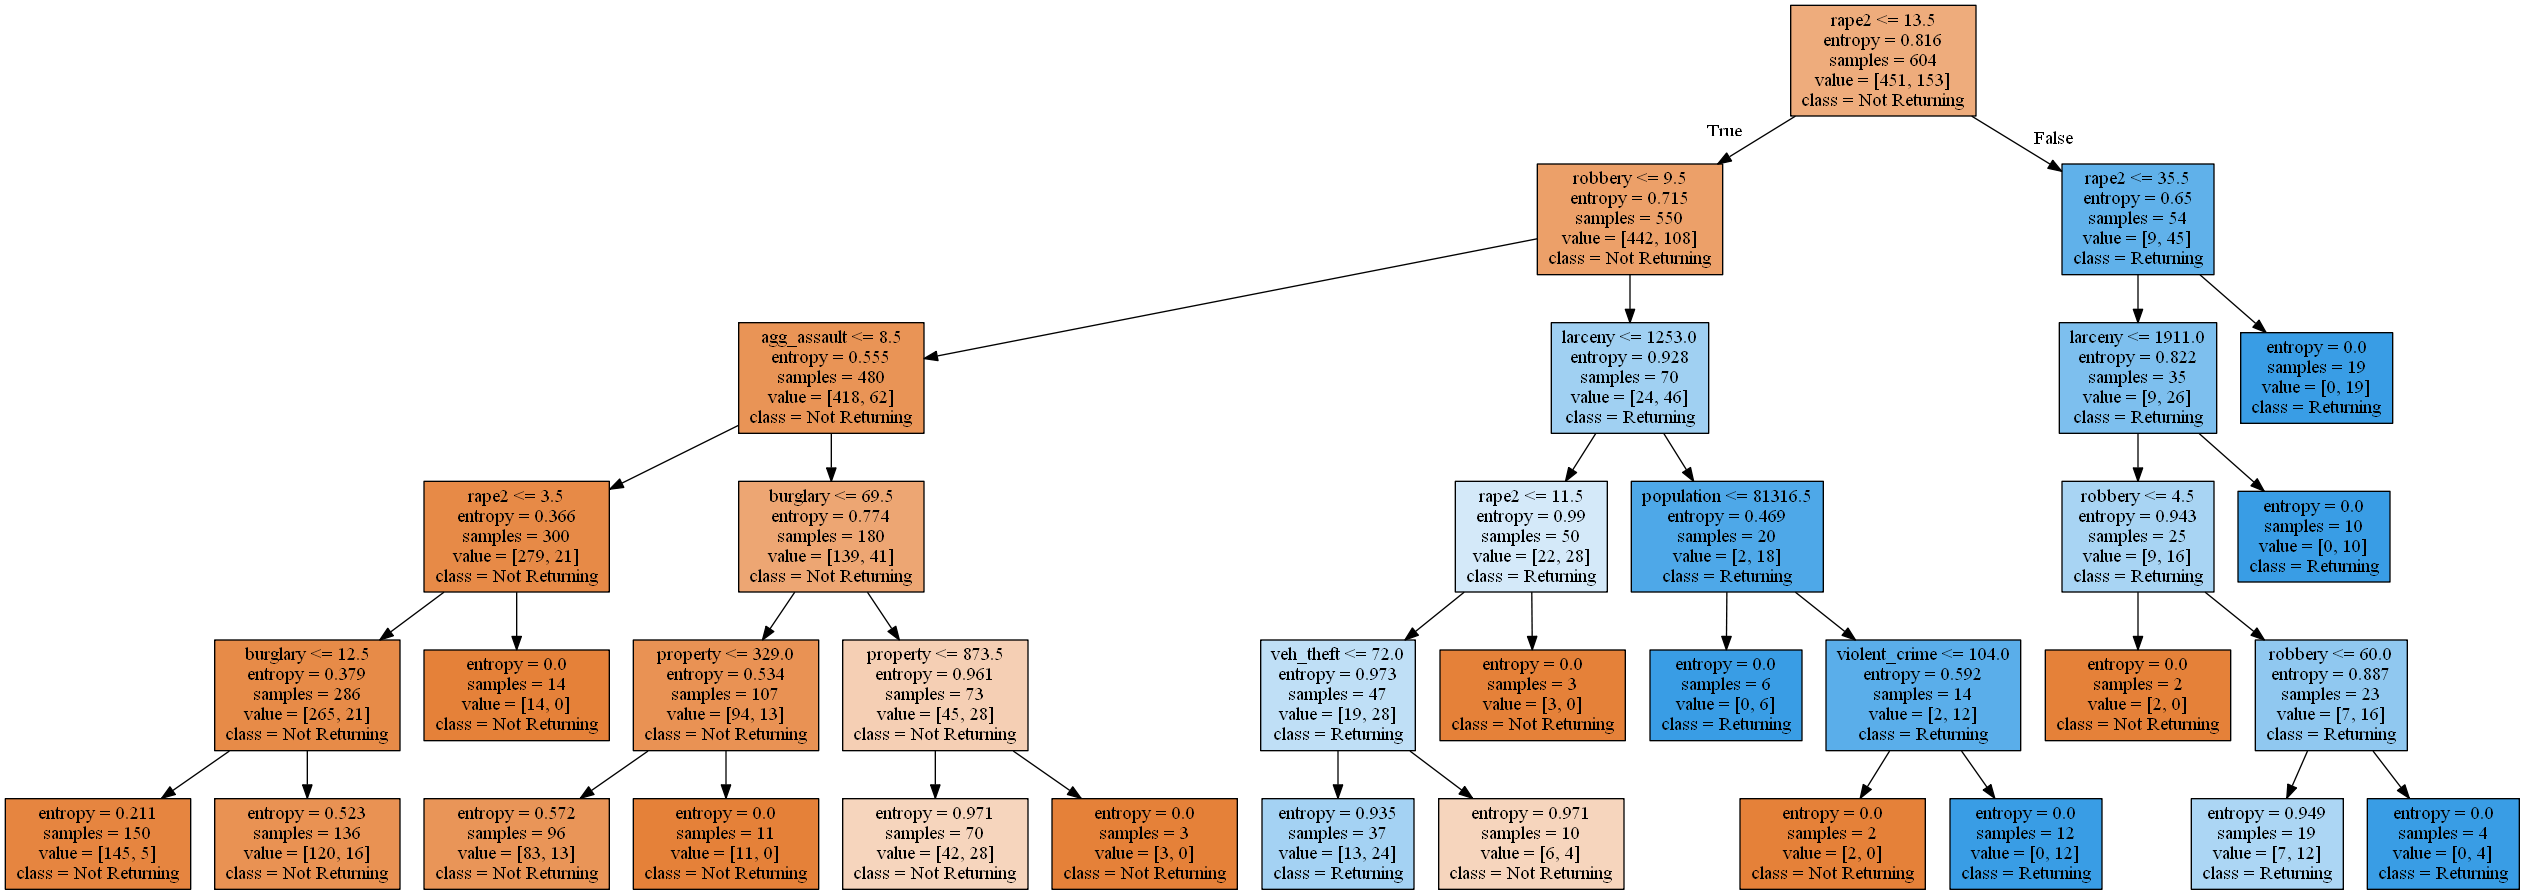

In [48]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_features=1, 
                                            max_depth=5)#, random_state = 1337) 
start_time = time.time()

decision_tree.fit(texcrime, texmurd)

dot_data = tree.export_graphviz(decision_tree, out_file=None, feature_names
                               =texcrime.columns, class_names=['Not Returning',
                                                             'Returning'],
                               filled=True)
print('Time elapsed: {} seconds'.format(time.time() - start_time))
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [49]:
from sklearn.preprocessing import StandardScaler
texcrime_scaled = pd.DataFrame(StandardScaler().fit_transform(texcrime))
texcrime_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.209288,-0.138882,-0.178489,-0.099768,-0.159453,-0.176940,-0.164327,-0.186489,-0.126026,-0.111277
1,0.666214,0.326836,0.632918,0.177396,0.427790,0.557502,0.594766,0.588914,0.237280,0.285952
2,-0.110608,-0.089089,-0.090770,-0.075377,-0.093996,-0.057749,-0.079174,-0.053594,-0.037345,-0.111277
3,-0.088717,0.021239,0.062740,-0.039900,0.076192,0.027475,-0.025317,0.049270,-0.010169,-0.111277
4,-0.174577,-0.130095,-0.134629,-0.095333,-0.150102,-0.142511,-0.146860,-0.143012,-0.118874,-0.137758


In [50]:
texcrime_scaled.columns = texcrime.columns

In [51]:
texcrime_scaled.head()

,population,violent_crime,rape2,robbery,agg_assault,property,burglary,larceny,veh_theft,arson3
0,-0.209288,-0.138882,-0.178489,-0.099768,-0.159453,-0.176940,-0.164327,-0.186489,-0.126026,-0.111277
1,0.666214,0.326836,0.632918,0.177396,0.427790,0.557502,0.594766,0.588914,0.237280,0.285952
2,-0.110608,-0.089089,-0.090770,-0.075377,-0.093996,-0.057749,-0.079174,-0.053594,-0.037345,-0.111277
3,-0.088717,0.021239,0.062740,-0.039900,0.076192,0.027475,-0.025317,0.049270,-0.010169,-0.111277
4,-0.174577,-0.130095,-0.134629,-0.095333,-0.150102,-0.142511,-0.146860,-0.143012,-0.118874,-0.137758


### Run a Random Forest Classifier
Runtime = 0.205 seconds.
The takeaway from this comparison is that the Random Forest Classifier is considerably slower (due to its greater complexity)than a single Decision Tree.

In [56]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

start_time = time.time()
rand_forest_class = ensemble.RandomForestClassifier()
                                      
print(cross_val_score(rand_forest_class, texcrime_scaled, texmurd, cv=10))
print('Time elapsed: {} seconds'.format('%.30f' % (time.time() - start_time)))

[ 0.90322581  0.80327869  0.75409836  0.78333333  0.78333333  0.81666667
  0.86666667  0.85        0.83333333  0.83333333]
Time elapsed: 0.470255851745605468750000000000 seconds
